In [1]:
from threading import Thread
#Building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM


D:\Python\Python36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Python\Python36\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Python\Python36\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
D:\Python\Python36\lib\site-packages\google\auth\crypt\_cryptography_rsa.py:22: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography will remove support for Python 3.6.
  import cryptography.exceptions


In [2]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import math, random
from datetime import datetime
import datetime as dt
import yfinance as yf
import tweepy
import preprocessor as p
import re
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load data into a pandas DataFrame
df = pd.read_csv('dataset/Store_Item_Demand_Forecasting.csv', parse_dates=['date'])


In [5]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [6]:
df.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [7]:
year =  2016
store = 1
item = 1

In [8]:
df = pd.read_csv('dataset/Store_Item_Demand_Forecasting.csv')

# Filter the dataframe to include only item 1 and store 1
df = df[(df['item'] == item) & (df['store'] == store)]

# define the original date format
original_format = '%Y-%m-%d'

# convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# filter the dataframe to include only data from the year 2017
df = df[df['date'].dt.year == year]

# convert the 'date' column back to the original format
df['date'] = df['date'].dt.strftime(original_format)



In [9]:
df.head()

,date,store,item,sales
1095,2016-01-01,1,1,21
1096,2016-01-02,1,1,13
1097,2016-01-03,1,1,12
1098,2016-01-04,1,1,12
1099,2016-01-05,1,1,12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 1095 to 1460
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    366 non-null    object
 1   store   366 non-null    int64 
 2   item    366 non-null    int64 
 3   sales   366 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.3+ KB


In [11]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

def arima_model(train, test):
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(6,1 ,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        if isinstance(output, np.ndarray):
            yhat = output[0]
        else:
            yhat = output
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    return predictions

In [12]:
data = df

In [13]:
quote = "1"
data['sales'] = data['sales']
Quantity_date = data[['sales','date']]
Quantity_date.index = Quantity_date['date'].map(lambda x: parser(str(x)))
Quantity_date['sales'] = Quantity_date['sales'].map(lambda x: float(x))
Quantity_date = Quantity_date.fillna(Quantity_date.bfill())
Quantity_date = Quantity_date.drop(['date'],axis =1)
fig = plt.figure(figsize=(7.2,4.8),dpi=65)
plt.plot(Quantity_date)
plt.savefig('Trends.png')
plt.close(fig)

quantity = Quantity_date.values
size = int(len(quantity) * 0.80)
train, test = quantity[0:size], quantity[size:len(quantity)]
#fit in model
predictions = arima_model(train, test)

#plot graph
fig = plt.figure(figsize=(7.2,4.8),dpi=65)
plt.plot(test,label='Actual Price')
plt.plot(predictions,label='Predicted Price')
plt.legend(loc=4)
plt.savefig('ARIMA.png')
plt.close(fig)
print()
print("##############################################################################")
arima_pred=predictions[-2]
print("Tomorrow's",quote," Closing Price Prediction by ARIMA:",arima_pred)
#rmse calculation
error_arima = math.sqrt(mean_squared_error(test, predictions))
print("ARIMA RMSE:",error_arima)
print("##############################################################################")
        
        

D:\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """



##############################################################################
Tomorrow's 1  Closing Price Prediction by ARIMA: 18.27846145418877
ARIMA RMSE: 5.453695694689011
##############################################################################


In [96]:
len(predictions)

74

In [69]:
len(test)

73

In [75]:

# def arima_model(train, test, future_steps=0):
#     history = [x for x in train]
#     predictions = list()
#     model = ARIMA(history, order=(6, 1, 0))
#     model_fit = model.fit()
#     for t in range(len(test)):
#         output = model_fit.forecast()
#         if isinstance(output, np.ndarray):
#             yhat = output[0]
#         else:
#             yhat = output
#         predictions.append(yhat)
#         obs = test[t]
#         history.append(obs)
#     if future_steps > 0:
#         future_predictions = model_fit.forecast(steps=future_steps)[0]
#         if isinstance(future_predictions, np.float64):
#             predictions.append(future_predictions)
#         else:
#             predictions.extend(future_predictions)
#     return predictions


# # fit the model on training data and make predictions for test data
# predictions = arima_model(train, test)

# # predict next 7 days of sales
# future_steps = 7
# future_predictions = arima_model(quantity, [], future_steps)

# print(future_predictions)
# # # plot graph
# # fig = plt.figure(figsize=(7.2,4.8),dpi=65)
# # plt.plot(quantity,label='Historical Price')
# # plt.plot(range(len(train), len(quantity)), test,label='Actual Price')
# # plt.plot(range(len(train), len(quantity) + future_steps), future_predictions,label='Predicted Price')
# # plt.legend(loc=4)
# # plt.savefig('ARIMA_Future.png')
# # plt.close(fig)
# # print()
# # print("##############################################################################")
# # print("Next 7 days sales predictions by ARIMA:", future_predictions[-future_steps:])
# # print("##############################################################################")


[46.33196813588927]


# Lin Reg

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt2
from sklearn.ensemble import RandomForestRegressor

def RAN_FOREST_ALGO(df):
        #No of days to be forcasted in future
        forecast_out = int(1)
        #Price after n days
        df['Sales after n days'] = df['sales'].shift(-forecast_out)
        #New df with only relevant data
        df_new=df[['sales','Sales after n days']]

        #Structure data for train, test & forecast
        #lables of known data, discard last 35 rows
        y =np.array(df_new.iloc[:-forecast_out,-1])
        y=np.reshape(y, (-1,1))
        #all cols of known data except lables, discard last 35 rows
        X=np.array(df_new.iloc[:-forecast_out,0:-1])
        #Unknown, X to be forecasted
        X_to_be_forecasted=np.array(df_new.iloc[-forecast_out:,0:-1])
        
        #Traning, testing to plot graphs, check accuracy
        X_train=X[0:int(0.8*len(df)),:]
        X_test=X[int(0.8*len(df)):,:]
        y_train=y[0:int(0.8*len(df)),:]
        y_test=y[int(0.8*len(df)):,:]
        
        # Feature Scaling===Normalization
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        
        X_to_be_forecasted=sc.transform(X_to_be_forecasted)
        
        #Training
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        
        #Testing
        y_test_pred=clf.predict(X_test)
        y_test_pred=y_test_pred*(1.04)
        import matplotlib.pyplot as plt2
        fig = plt2.figure(figsize=(7.2,4.8),dpi=65)
        plt2.plot(y_test,label='Actual Price' )
        plt2.plot(y_test_pred,label='Predicted Price')
        
        plt2.legend(loc=4)
        plt2.savefig('static/RF.png')
        plt2.close(fig)
        
        error_lr = math.sqrt(mean_squared_error(y_test, y_test_pred))
        
        
        #Forecasting
        forecast_set = clf.predict(X_to_be_forecasted)
        forecast_set=forecast_set*(1.04)
        mean=forecast_set.mean()
        lr_pred=forecast_set[0]
        print()
        print("##############################################################################")
        print("Tomorrow's ",quote," Closing Price Prediction by Random Forest: ",lr_pred)
        print("Random Forest RMSE:",error_lr)
        print("##############################################################################")
        return df, lr_pred, forecast_set, mean, error_lr
  
  

In [32]:
RAN_FOREST_ALGO(df)

D:\Python\Python36\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



##############################################################################
Tomorrow's  1  Closing Price Prediction by Random Forest:  16.51031165860283
Random Forest RMSE: 6.388226937975436
##############################################################################


(            date  store  item  sales  sales after n days  Sales after n days
 1095  2016-01-01      1     1     21                13.0                13.0
 1096  2016-01-02      1     1     13                12.0                12.0
 1097  2016-01-03      1     1     12                12.0                12.0
 1098  2016-01-04      1     1     12                12.0                12.0
 1099  2016-01-05      1     1     12                16.0                16.0
 ...          ...    ...   ...    ...                 ...                 ...
 1456  2016-12-27      1     1     10                16.0                16.0
 1457  2016-12-28      1     1     16                21.0                21.0
 1458  2016-12-29      1     1     21                24.0                24.0
 1459  2016-12-30      1     1     24                14.0                14.0
 1460  2016-12-31      1     1     14                 NaN                 NaN
 
 [366 rows x 6 columns],
 16.51031165860283,
 array([16.510311

In [167]:
training_set

array([], shape=(365, 0), dtype=float64)

Epoch 1/50
9/9 [==============================] - 2s 8ms/step - loss: 0.1473
Epoch 2/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0358
Epoch 3/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0307
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0285
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0261
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0258
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0254
Epoch 8/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0254
Epoch 9/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0249
Epoch 10/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0247
Epoch 11/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0251
Epoch 12/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0249
Epoch 13/50
9/9 [==============================] - 0s 7ms/step - loss: 0.

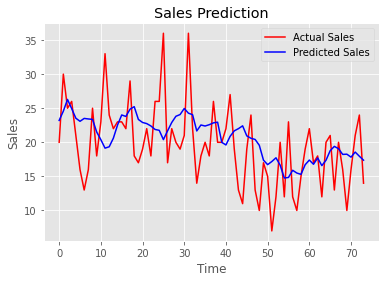

In [184]:

# Split the data into training and testing sets
training_size = int(0.8 * len(df))
training_set = df.iloc[:training_size, 3:4].values
testing_set = df.iloc[training_size:, 3:4].values

# Scale the data
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Generate training data with 7 days memory
X_train = []
y_train = []
for i in range(7, training_size):
    X_train.append(training_set_scaled[i-7:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data for the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

# Generate testing data with 7 days memory
inputs = df.iloc[len(df) - len(testing_set) - 7:, 3:4].values
inputs = sc.transform(inputs)

X_test = []
for i in range(7, len(inputs)):
    X_test.append(inputs[i-7:i, 0])
X_test = np.array(X_test)

# Reshape the data for the LSTM model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Generate predicted sales for the testing data
predicted_sales = model.predict(X_test)
predicted_sales = sc.inverse_transform(predicted_sales)

# Calculate the RMSE score
rmse = np.sqrt(mean_squared_error(testing_set, predicted_sales))
print("RMSE score:", rmse)

# Print the predicted sales for the next day
next_day_sales = sc.inverse_transform(model.predict(np.reshape(X_test[-1], (1, X_test.shape[1], 1))))[0][0]
print("Predicted sales for the next day:", next_day_sales)

# Visualize the results
plt.plot(testing_set, color = 'red', label = 'Actual Sales')
plt.plot(predicted_sales, color = 'blue', label = 'Predicted Sales')
plt.title('Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [209]:
from sklearn.preprocessing import MinMaxScaler

#**************** FUNCTIONS TO FETCH DATA ***************************
def get_historical(year,store,item):
    df = pd.read_csv('dataset/Store_Item_Demand_Forecasting.csv')

    # Filter the dataframe to include only item 1 and store 1
    df = df[(df['item'] == item) & (df['store'] == store)]

    # define the original date format
    original_format = '%Y-%m-%d'

    # convert the 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # filter the dataframe to include only data from the year 2017
    df = df[df['date'].dt.year == year]

    # convert the 'date' column back to the original format
    df['date'] = df['date'].dt.strftime(original_format)

    print(df.head())

    return df

#******************** ARIMA SECTION ********************
def ARIMA_ALGO(df):
    def parser(x):
        return datetime.strptime(x, '%Y-%m-%d')

    def arima_model(train, test):
        history = [x for x in train]
        predictions = list()
        for t in range(len(test)):
            model = ARIMA(history, order=(6,1 ,0))
            model_fit = model.fit()
            output = model_fit.forecast()
            if isinstance(output, np.ndarray):
                yhat = output[0]
            else:
                yhat = output
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)
        return predictions

    data = df

    data['sales'] = data['sales']
    Quantity_date = data[['sales','date']]
    Quantity_date.index = Quantity_date['date'].map(lambda x: parser(str(x)))
    Quantity_date['sales'] = Quantity_date['sales'].map(lambda x: float(x))
    Quantity_date = Quantity_date.fillna(Quantity_date.bfill())
    Quantity_date = Quantity_date.drop(['date'],axis =1)
    fig = plt.figure(figsize=(7.2,4.8),dpi=100)
    plt.plot(Quantity_date)
    plt.savefig('static/Trends.png')
    plt.close(fig)

    quantity = Quantity_date.values
    size = int(len(quantity) * 0.80)
    train, test = quantity[0:size], quantity[size:len(quantity)]
    #fit in model
    predictions = arima_model(train, test)

    #plot graph
    fig = plt.figure(figsize=(7.2,4.8),dpi=100)
    plt.plot(test,label='Actual Sales')
    plt.plot(predictions,label='Predicted Sales')
    plt.legend(loc=4)
    plt.title('ARIMA Sales Prediction')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.savefig('static/ARIMA.png')
    plt.close(fig)
    print()
    print("##############################################################################")
    arima_pred=predictions[-2]
    print("Next Days's sales",item," Prediction by ARIMA:",arima_pred)
    #rmse calculation
    error_arima = math.sqrt(mean_squared_error(test, predictions))
    print("ARIMA RMSE:",error_arima)
    print("##############################################################################")
    return arima_pred, error_arima

#************* LSTM SECTION **********************

def LSTM_ALGO(df):

    # Split the data into training and testing sets
    training_size = int(0.8 * len(df))
    training_set = df.iloc[:training_size, 3:4].values
    testing_set = df.iloc[training_size:, 3:4].values

    # Scale the data
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)

    # Generate training data with 7 days memory
    X_train = []
    y_train = []
    for i in range(7, training_size):
        X_train.append(training_set_scaled[i-7:i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshape the data for the LSTM model
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(LSTM(units = 50))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs = 50, batch_size = 32)

    # Generate testing data with 7 days memory
    inputs = df.iloc[len(df) - len(testing_set) - 7:, 3:4].values
    inputs = sc.transform(inputs)

    X_test = []
    for i in range(7, len(inputs)):
        X_test.append(inputs[i-7:i, 0])
    X_test = np.array(X_test)

    # Reshape the data for the LSTM model
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Generate predicted sales for the testing data
    predicted_sales = model.predict(X_test)
    predicted_sales = sc.inverse_transform(predicted_sales)

    # Calculate the RMSE score
    rmse = np.sqrt(mean_squared_error(testing_set, predicted_sales))
    print("RMSE score:", rmse)

    # Print the predicted sales for the next day
    next_day_sales = sc.inverse_transform(model.predict(np.reshape(X_test[-1], (1, X_test.shape[1], 1))))[0][0]
    print("Predicted sales for the next day:", next_day_sales)

    # Visualize the results
    fig = plt.figure(figsize=(7.2,4.8),dpi=100)
    plt.plot(testing_set, label = 'Actual Sales')
    plt.plot(predicted_sales,  label = 'Predicted Sales')
    plt.title('LSTM Sales Prediction')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.legend()
    plt.legend(loc=4)
    plt.savefig('static/LSTM.png')
    plt.close(fig)
    return next_day_sales,rmse

#***************** LINEAR REGRESSION SECTION ******************       
def LIN_REG_ALGO_NORMAL(df):
    #No of days to be forcasted in future
    forecast_out = int(1)
    #Price after n days
    df['sales after n days'] = df['sales'].shift(-forecast_out)
    #New df with only relevant data
    df_new=df[['sales','sales after n days']]

    #Structure data for train, test & forecast
    #lables of known data, discard last 35 rows
    y =np.array(df_new.iloc[:-forecast_out,-1])
    y=np.reshape(y, (-1,1))
    #all cols of known data except lables, discard last 35 rows
    X=np.array(df_new.iloc[:-forecast_out,0:-1])
    #Unknown, X to be forecasted
    X_to_be_forecasted=np.array(df_new.iloc[-forecast_out:,0:-1])

    #Traning, testing to plot graphs, check accuracy
    X_train=X[0:int(0.8*len(df)),:]
    X_test=X[int(0.8*len(df)):,:]
    y_train=y[0:int(0.8*len(df)),:]
    y_test=y[int(0.8*len(df)):,:]

    # Feature Scaling===Normalization
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    X_to_be_forecasted=sc.transform(X_to_be_forecasted)

    #Training
    clf = LinearRegression(n_jobs=-1)
    clf.fit(X_train, y_train)

    #Testing
    y_test_pred=clf.predict(X_test)
    y_test_pred=y_test_pred*(1.04)
    import matplotlib.pyplot as plt2
    fig = plt2.figure(figsize=(7.2,4.8),dpi=100)
    plt2.plot(y_test,label='Actual Sales' )
    plt2.plot(y_test_pred,label='Predicted Sales')
    plt.title('LR Sales Prediction')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt2.legend(loc=4)
    plt2.savefig('static/LR.png')
    plt2.close(fig)

    

    
    error_lr = math.sqrt(mean_squared_error(y_test, y_test_pred))


    #Forecasting
    forecast_set = clf.predict(X_to_be_forecasted)
    forecast_set=forecast_set*(1.04)
    mean=forecast_set.mean()
    lr_pred=forecast_set[0,0]
    print()
    print("##############################################################################")
    print("Next Day's ",item," Sales Prediction by Linear Regression: ",lr_pred)
    print("Linear Regression RMSE:",error_lr)
    print("##############################################################################")
    return df, lr_pred, forecast_set, mean, error_lr


#***************** LINEAR REGRESSION SECTION ******************       
def LIN_REG_ALGO(df,forecast_days):
    #No of days to be forcasted in future
    forecast_out = int(forecast_days)
    #Price after n days
    df['sales after n days'] = df['sales'].shift(-forecast_out)
    #New df with only relevant data
    df_new=df[['sales','sales after n days']]

    #Structure data for train, test & forecast
    #lables of known data, discard last 35 rows
    y =np.array(df_new.iloc[:-forecast_out,-1])
    y=np.reshape(y, (-1,1))
    #all cols of known data except lables, discard last 35 rows
    X=np.array(df_new.iloc[:-forecast_out,0:-1])
    #Unknown, X to be forecasted
    X_to_be_forecasted=np.array(df_new.iloc[-forecast_out:,0:-1])

    #Traning, testing to plot graphs, check accuracy
    X_train=X[0:int(0.8*len(df)),:]
    X_test=X[int(0.8*len(df)):,:]
    y_train=y[0:int(0.8*len(df)),:]
    y_test=y[int(0.8*len(df)):,:]

    # Feature Scaling===Normalization
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    X_to_be_forecasted=sc.transform(X_to_be_forecasted)

    #Training
    clf = LinearRegression(n_jobs=-1)
    clf.fit(X_train, y_train)

    #Testing
    y_test_pred=clf.predict(X_test)
    y_test_pred=y_test_pred*(1.04)
    error_lr = math.sqrt(mean_squared_error(y_test, y_test_pred))


    #Forecasting
    forecast_set = clf.predict(X_to_be_forecasted)
    forecast_set=forecast_set*(1.04)
    mean=forecast_set.mean()
    lr_pred=forecast_set[0,0]
    print()
    
    fig = plt2.figure(figsize=(7.2,4.8),dpi=200)
    plt2.plot(forecast_set,label='Predicted Sales')
    plt.title('Predicted Saled for Next '+str(forecast_days)+" Days")
    plt.xlabel('Days')
    plt.ylabel('Sales')
    plt2.legend(loc=4)
    plt2.savefig('static/FORECASTING.png')
    plt2.close(fig)

    
    print("##############################################################################")
    print("Next Day's ",item," Sales Prediction by Linear Regression: ",lr_pred)
    print("Linear Regression RMSE:",error_lr)
    print("##############################################################################")
    return df, lr_pred, forecast_set, mean, error_lr



In [210]:


print("##############################################################################")
print("Getting Product Data\nYear Data: ",year,"\nStore ID: ",store,"\nItem ID: ",item)
df =get_historical(year,store,item)
print("##############################################################################")
df = df.dropna()

today_sales=df.iloc[-1:]
arima_pred,error_arima=ARIMA_ALGO(df.copy())
lstm_pred, error_lstm=LSTM_ALGO(df.copy())
df, lr_pred, forecast_set,mean,error_lr=LIN_REG_ALGO_NORMAL(df.copy())
df, lr_pred, forecast_set,mean,error_lr=LIN_REG_ALGO(df.copy(),50)



quote=    "Store: "+str(store)+" Item: "+str(item)
print()
print("Forecasted Sales for Next 7 days: "+quote+"\n")
print(forecast_set)


##############################################################################
Getting Product Data
Year Data:  2016 
Store ID:  1 
Item ID:  1
            date  store  item  sales
1095  2016-01-01      1     1     21
1096  2016-01-02      1     1     13
1097  2016-01-03      1     1     12
1098  2016-01-04      1     1     12
1099  2016-01-05      1     1     12
##############################################################################


D:\Python\Python36\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##############################################################################
Next Days's sales 1  Prediction by ARIMA: 18.27846145418877
ARIMA RMSE: 5.453695694689011
##############################################################################
Epoch 1/50
9/9 [==============================] - 7s 11ms/step - loss: 0.1581
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0346
Epoch 3/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0328
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0272
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0257
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0258
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0256
Epoch 8/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0248
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0252
Epoch 10/50
9/9 [==============================] -